<div class="alert alert-block alert-info" style="background-color: #323031; color:#ffffff; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;padding:25px; width:90%">

# Python for Accounting - Session 2

&nbsp;

Welcome to the Python for Accounting practical session. 

This series of practical sessions consists of two sessions, that will teach you to work with stock data and accounting documents in Python. 

In this session, you will learn how to add returns for different time scales to a dataframe, visualize returns at different time scales in a grid plot. You will also learn how to transform income statements with pandas and visualize them as a bar plot with the seaborn library.

<div  class="alert alert-block alert-info" style="color:#1b1b1b; background-color:#f2f2f2; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;padding:25px; width:90%">
    
    
### What you will learn in this session
    
Part 1 - Visualizing returns for different time intervals

- calculate monthly and annual returns as new columns 
- creating matplotlib chart objects
- creating and plotting at separate subplots inside a figure
- plotting daily and monthly returns as subplots in one figure

Part 2 - Comparing big tech companies
- Combine financial statements from different companies into a single dataframe 
- Calculate new columns/variables  
- Reshape and prepare a dataframe for plotting
- Create a margin plot and customize appearance with seaborn 
    

<br>
    
### What to do when getting stuck
<ol>
    <li>Ask the trainer if you struggle to find a solution.</li>
    <li>Search online:</li>
    <ol>
        <li>The answer box on the top of Google's results page</li>
        <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
        <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
        <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
    </ol>
</ol>

<br>

### Using your own laptop

1. Open the Anaconda prompt. Open the search bar (Windows-key or Cmd+Space) and type in Anaconda prompt.
2. Type jupyter lab and hit Enter.
3. In the jupyter lab app, select the folder from the menu on the left side where you downloaded the notebook.
4. Double-click on the notebook to open it.

If you are using your own laptop and haven't been able to install Anaconda, you will have to use Google Colab (see below).

### Using Google Colab

1. Open the [google colab](https://colab.research.google.com/) website.
2. Select Upload and select the notebook from your harddrive.


### Opening the jupyter notebook

To open the jupyter notebook, you will need to launch the **jupyter lab app**.

1. Open the Anaconda prompt (Click the Windows key and type in Anaconda Prompt and hit Enter).
2. Switch to the H-drive by typing in H: and hit Enter.
3. Type in jupyter lab and hit Enter.
4. In the jupyter lab app, select the folder from the menu on the left side where you downloaded the notebook.
5. Double-click on the notebook to open it.

<br>

<br>

## Review of part 2 of last session

- Downloading stock price data with yfinance
- Calculating returns
- Calculating total returns

In [1]:
import yfinance as yf
import pandas as pd

nflx = yf.download('nflx', start="2009-01-01")

nflx['ret'] = nflx['Adj Close'].pct_change()
nflx['ret_1'] = nflx['ret'] + 1

nflx.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2009-01-02  4.217143  4.357143  4.200000  4.267143   4.267143   6605200   
2009-01-05  4.327143  4.562857  4.302857  4.562857   4.562857  13044500   
2009-01-06  4.591429  4.750000  4.590000  4.705714   4.705714  12065900   
2009-01-07  4.715714  4.734286  4.571429  4.672857   4.672857  10133900   
2009-01-08  4.618571  4.797143  4.485714  4.735714   4.735714   8175300   

                 ret     ret_1  
Date                            
2009-01-02       NaN       NaN  
2009-01-05  0.069300  1.069300  
2009-01-06  0.031309  1.031309  
2009-01-07 -0.006982  0.993018  
2009-01-08  0.013452  1.013452

Calculating total returns for first year

In [3]:
nflx_2019 = nflx.loc['2019']
nflx_2019["ret_1"].prod() - 1

np.float64(0.20888441641317934)

Calculating total returns for each month/year

- using resample
- resample is like grouping, but using dates instead of categorical values or what we usually understand as a group

In [5]:
ann_ret = nflx.resample('1A')['ret_1'].prod()
ann_ret

/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/2341379354.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ann_ret = nflx.resample('1A')['ret_1'].prod()


Date
2009-12-31    1.844325
2010-12-31    3.189327
2011-12-31    0.394365
2012-12-31    1.336268
2013-12-31    3.976347
2014-12-31    0.927859
2015-12-31    2.343784
2016-12-31    1.082357
2017-12-31    1.550565
2018-12-31    1.394353
2019-12-31    1.208884
2020-12-31    1.671138
2021-12-31    1.114124
2022-12-31    0.489476
2023-12-31    1.651112
2024-12-31    1.482419
Freq: YE-DEC, Name: ret_1, dtype: float64

In [6]:
month_ret = nflx.resample('1M')['ret_1'].prod()
month_ret

/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/217354607.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ret = nflx.resample('1M')['ret_1'].prod()


Date
2009-01-31    1.209910
2009-02-28    1.002767
2009-03-31    1.184327
2009-04-30    1.055685
2009-05-31    0.870007
                ...   
2024-06-30    1.051838
2024-07-31    0.931054
2024-08-31    1.116177
2024-09-30    1.011293
2024-10-31    1.017610
Freq: ME, Name: ret_1, Length: 190, dtype: float64

&nbsp;

### Calculating new columns for the monthly return rates

The way we have calculated the monthly return rates, we wouldn't be able to add them to the dataframe with the daily returns since we aggregated the data to only one return value per month, whereas the original dataframe has a row for each day.

The `.transform()` method enables us to replicate the monthly returns for as many times as there are days in each different month.

Let us start with the annual returns and compare the output when using `.prod()` and `.transform('prod')`.

In [16]:
amzn = yf.download('amzn')
amzn["ret"] = amzn["Adj Close"].pct_change()
amzn["ret_1"] = amzn["ret"] + 1

amzn

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...                ...         ...         ...         ...         ...   
2024-10-02  184.440002  186.600006  184.039993  184.759995  184.759995   
2024-10-03  183.050003  183.440002  180.880005  181.960007  181.960007   
2024-10-04  185.750000  187.600006  183.600006  186.509995  186.509995   
2024-10-07  182.949997  183.600006  180.250000  180.800003  180.800003   
2024-10-08  181.919998  183.089996  180.919998  182.720001  182.720001   

                Volume       ret     ret_1  
Date                                        
1997-05-15  1443120000       NaN       NaN  
1997-05-16   294000000 -0.117028  0.882972  
1997-05-19   122136000 -0.012040  0.987960  
1997-05-20   109344000 -0.042685  0.957315  
1997-05-21   377064000 -0.127392  0.872608  
...                ...       ...       ...  
2024-10-02    23704100 -0.001999  0.998001  
2024-10-03    30204300 -0.015155  0.984845  
2024-10-04    40890300  0.025005  1.025005  
2024-10-07    42364200 -0.030615  0.969385  
2024-10-08    26258600  0.010619  1.010619  

[6895 rows x 8 columns]

While using `.prod()` returns the return rate for each year only once, `.transform('prod')` replicates the annual return rate for as many days as there are in each year.

The last row shows us that there are 6434 values when using `.transform('prod')`. This is exactly as many rows the original dataframe has.

In [17]:
amzn.resample("1A")["ret_1"].prod()

/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/2555170871.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  amzn.resample("1A")["ret_1"].prod()


Date
1997-12-31     2.563825
1998-12-31    10.663885
1999-12-31     1.421790
2000-12-31     0.204433
2001-12-31     0.695261
2002-12-31     1.745841
2003-12-31     2.785601
2004-12-31     0.841695
2005-12-31     1.064574
2006-12-31     0.836903
2007-12-31     2.347694
2008-12-31     0.553541
2009-12-31     2.623245
2010-12-31     1.338091
2011-12-31     0.961667
2012-12-31     1.449278
2013-12-31     1.589628
2014-12-31     0.778229
2015-12-31     2.177831
2016-12-31     1.109456
2017-12-31     1.559564
2018-12-31     1.284317
2019-12-31     1.230277
2020-12-31     1.762561
2021-12-31     1.023768
2022-12-31     0.503848
2023-12-31     1.808810
2024-12-31     1.202580
Freq: YE-DEC, Name: ret_1, dtype: float64

In [18]:
amzn.resample("1A")["ret_1"].transform("prod")

/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/1030614402.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  amzn.resample("1A")["ret_1"].transform("prod")


Date
1997-05-15    2.563825
1997-05-16    2.563825
1997-05-19    2.563825
1997-05-20    2.563825
1997-05-21    2.563825
                ...   
2024-10-02    1.202580
2024-10-03    1.202580
2024-10-04    1.202580
2024-10-07    1.202580
2024-10-08    1.202580
Name: ret_1, Length: 6895, dtype: float64

In [19]:
print(amzn.resample("1A")["ret_1"].transform("prod").shape)
print(amzn.shape)

(6895,)
(6895, 8)


/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/940989166.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  print(amzn.resample("1A")["ret_1"].transform("prod").shape)


By using `.transform('prod')` the monthly return rates will directly map onto the rows in the original dataframe, and we can use these values to create a new column for the monthly returns.

In [21]:
amzn['monthly_ret'] = amzn.resample('1M')['ret_1'].transform('prod')

/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/723265063.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amzn['monthly_ret'] = amzn.resample('1M')['ret_1'].transform('prod')


Below you can see how this has created a new column **monthly_ret** with the product of the values from the **daily_ret_1** column for each month. 

<img src="https://www.dropbox.com/s/kzd1fgatnu8neki/groupby_transform.png?raw=1">

To change these values from a multiplier to a signed rate, similar to the **daily_ret** column, we have to subtract 1.

In [22]:
amzn['monthly_ret'] = amzn['monthly_ret'] - 1

In [23]:
amzn.head(32)

Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   
1997-05-22  0.071875  0.072396  0.065625  0.069792   0.069792   235536000   
1997-05-23  0.070313  0.076042  0.066667  0.075000   0.075000   318744000   
1997-05-27  0.075521  0.082292  0.072917  0.079167   0.079167   173952000   
1997-05-28  0.081250  0.081771  0.076563  0.076563   0.076563    91488000   
1997-05-29  0.077083  0.077083  0.073958  0.075260   0.075260    69456000   
1997-05-30  0.075000  0.075521  0.073958  0.075000   0.075000    51888000   
1997-06-02  0.075521  0.076563  0.075000  0.075521   0.075521    11832000   
1997-06-03  0.076563  0.076563  0.073958  0.073958   0.073958    23664000   
1997-06-04  0.073958  0.074479  0.069792  0.070833   0.070833    61608000   
1997-06-05  0.070833  0.077083  0.068750  0.077083   0.077083   113448000   
1997-06-06  0.075781  0.085417  0.075521  0.082813   0.082813   156144000   
1997-06-09  0.082813  0.085417  0.082813  0.084375   0.084375    47040000   
1997-06-10  0.085417  0.085417  0.076563  0.079167   0.079167   109176000   
1997-06-11  0.079688  0.080208  0.076563  0.077083   0.077083    23760000   
1997-06-12  0.079167  0.082292  0.077604  0.080208   0.080208    32640000   
1997-06-13  0.081250  0.081250  0.079167  0.079167   0.079167    13872000   
1997-06-16  0.080208  0.080208  0.078125  0.078646   0.078646    18264000   
1997-06-17  0.079948  0.079948  0.074740  0.075260   0.075260    94128000   
1997-06-18  0.076042  0.076823  0.075000  0.075521   0.075521    49296000   
1997-06-19  0.075521  0.076563  0.075000  0.075521   0.075521    20064000   
1997-06-20  0.076563  0.077604  0.075000  0.076302   0.076302    67752000   
1997-06-23  0.077083  0.077083  0.073958  0.075000   0.075000    20952000   
1997-06-24  0.075260  0.076302  0.073958  0.075521   0.075521    15024000   
1997-06-25  0.076302  0.076302  0.074479  0.075521   0.075521    42120000   
1997-06-26  0.076042  0.076042  0.075260  0.075521   0.075521    63792000   
1997-06-27  0.075781  0.075781  0.073958  0.074479   0.074479    23760000   
1997-06-30  0.075521  0.079948  0.073958  0.077083   0.077083    54936000   

                 ret     ret_1  monthly_ret  
Date                                         
1997-05-15       NaN       NaN    -0.234045  
1997-05-16 -0.117028  0.882972    -0.234045  
1997-05-19 -0.012040  0.987960    -0.234045  
1997-05-20 -0.042685  0.957315    -0.234045  
1997-05-21 -0.127392  0.872608    -0.234045  
1997-05-22 -0.021891  0.978109    -0.234045  
1997-05-23  0.074622  1.074622    -0.234045  
1997-05-27  0.055560  1.055560    -0.234045  
1997-05-28 -0.032892  0.967108    -0.234045  
1997-05-29 -0.017019  0.982981    -0.234045  
1997-05-30 -0.003455  0.996545    -0.234045  
1997-06-02  0.006947  1.006947     0.027773  
1997-06-03 -0.020696  0.979304     0.027773  
1997-06-04 -0.042254  0.957746     0.027773  
1997-06-05  0.088236  1.088236     0.027773  
1997-06-06  0.074335  1.074335     0.027773  
1997-06-09  0.018862  1.018862     0.027773  
1997-06-10 -0.061724  0.938276     0.027773  
1997-06-11 -0.026324  0.973676     0.027773  
1997-06-12  0.040541  1.040541     0.027773  
1997-06-13 -0.012979  0.987021     0.027773  
1997-06-16 -0.006581  0.993419     0.027773  
1997-06-17 -0.043054  0.956946     0.027773  
1997-06-18  0.003468  1.003468     0.027773  
1997-06-19  0.000000  1.000000     0.027773  
1997-06-20  0.010341  1.010341     0.027773  
1997-06-23 -0.017064  0.982936     0.027773  
1997-06-24  0.006947  1.006947     0.027773  
1997-06-25  0.000

### Task 1: Monthly Netflix returns

1. Copy past your code from the 2nd workshop or write new code to:
    - download the Netflix stock price data from yahoo finance
    - calculate the daily returns
    - add another column for the returns + 1
2. Create a new column **monthly_ret** for the monthly returns.
3. Subtract 1 from the **monthly_ret** column.

In [15]:
# new column for monthly returns


# Subtract 1 from the monthly returns column


# print first 30 rows



[*********************100%***********************]  1 of 1 completed
/var/folders/yn/13jt8_t17nl29b4w1ft2sz580000gp/T/ipykernel_10275/3964656351.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nflx["monthly_ret"] = nflx.resample("1M")["ret_1"].transform("prod") - 1


Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000   
2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800   
2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400   
2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800   
2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200   

                 ret     ret_1  monthly_ret  
Date                                         
2002-05-23       NaN       NaN    -0.100298  
2002-05-24  0.011343  1.011343    -0.100298  
2002-05-28 -0.043684  0.956316    -0.100298  
2002-05-29 -0.046297  0.953703    -0.100298  
2002-05-30 -0.029125  0.970875    -0.100298

&nbsp;

&nbsp;


## The object-oriented approach to plotting with matplotlib

Now that we have calculated the returns for each day and month, we can plot them together with the adjusted close price in separate subplots inside a single chart.

Before we get into how to write the code to do that, let us first look at the two different approaches how you can create plots with matplotlib.

#### Using functions and the matplotlib objects

The first approach is to use the functions from the matplotlib library to create and customize a plot. This is what we did when we used the `plt.plot()` or `plt.fill_between()` functions to create a line or area plot, and the `plt.title()` or `plt.grid()` functions to set a title or grid. Remember that we imported the matplotlib.pyplot library under the alias plt. So when we call `plt.plot()` we are calling a function from the matplotlib library.

This approach obscures the fact, that behind the scenes, you are creating a hierarchy of objects. To understand this better, we need to have a look at the different elements a chart in matplotlib consists of.

At the highest level we have the **figure** object, which is the general chart region, wherein a single or several plots can be created. The different plots within a figure are called **axes**. Within the **axes** objects, we have all the smaller objects like the **title**, **ticks**, **lines**, **legend** etc.

It is a bit confusion that matplotlib calls the plots within a **figure** **axes**. An **axes** does thus not refer to the axis of a plot, but the actual plot itself. 

You can see below that a **figure** can consist of several plots or **axes** and that each **ax** object consists of smaller objects such as **titles** and **axis** etc. The **axes** objects are enclosed within the **figure** object and the **axis** and **title** objects are enclosed within the **axes** object.

<img src="https://www.dropbox.com/s/oaxsc7261jxsg4m/mpl_figure.png?raw=1">

#### Using methods at the object level

This brings us to the second approach of creating plots with matplotlib by working with the chart objects and applying methods to these objects.

See the example below to compare how you to create a simple line plot both ways using the plt functions and the ax methods.

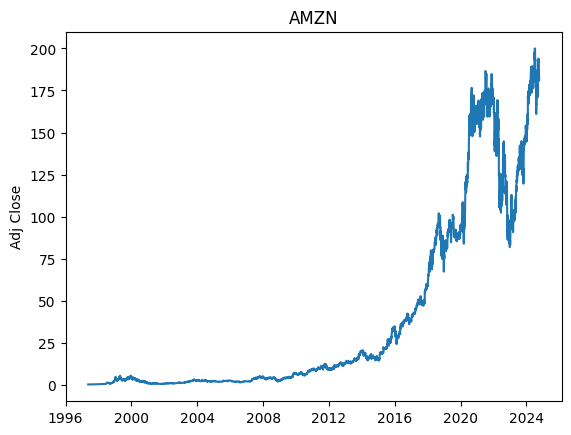

In [26]:
# using plt functions
import matplotlib.pyplot as plt

plt.plot(amzn.index, amzn['Adj Close']) # fig and ax object created in the background
plt.title('AMZN')
plt.ylabel('Adj Close')

plt.show()

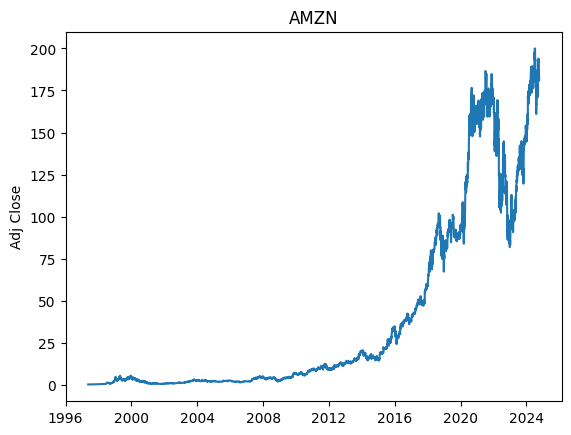

In [27]:
# using the ax object
fig, ax = plt.subplots()

ax.plot(amzn.index, amzn['Adj Close'])
ax.set_title('AMZN')
ax.set_ylabel('Adj Close')

plt.show()


```python
fig, ax = plt.subplots()

ax.plot(amzn.index, amzn['Adj Close'])
ax.set_title('AMZN')
ax.set_ylabel('Adj Close')

plt.show()
```


**Line 1: Creating the figure and axes object**

We first create a figure and an axes object with `fig, ax = plt.subplots()`. The axes object is the actual plot that you can see. The figure object is the region within which this plot is being displayed, which is not directly visible.

<br>

**Line 3: Adding a line plot**

With `ax.plot(amzn['Adj Close'])` we call the plot() method of the ax object to add a line plot of the Adj Close column of the amzn dataframe. The important point to understand about this step is that the line is drawn at the level of the axes object and not the figure.

<br>

**Line 4-5: Adding a title and yaxis label**

All further customization of the axes are done on the level of the axes object itself. We use `.set_title()` and `.set_ylabel()` to set a title or a ylabel.

<br>

### Task 2: Using an axes object to create a line plot

1. Create a figure and axes object using `plt.subplots()`
2. Plot the daily return rates from the Netflix stock dataset using the ax object
3. Add as a title 'NLFX' 
4. Add as a y-axis label 'Daily Return rate'.

&nbsp;

### Creating subplots with plt.subplots()

&nbsp;

We can use the `plt.subplots()` function to create a figure with several subplots. In the example below we create a figure with two subplots.

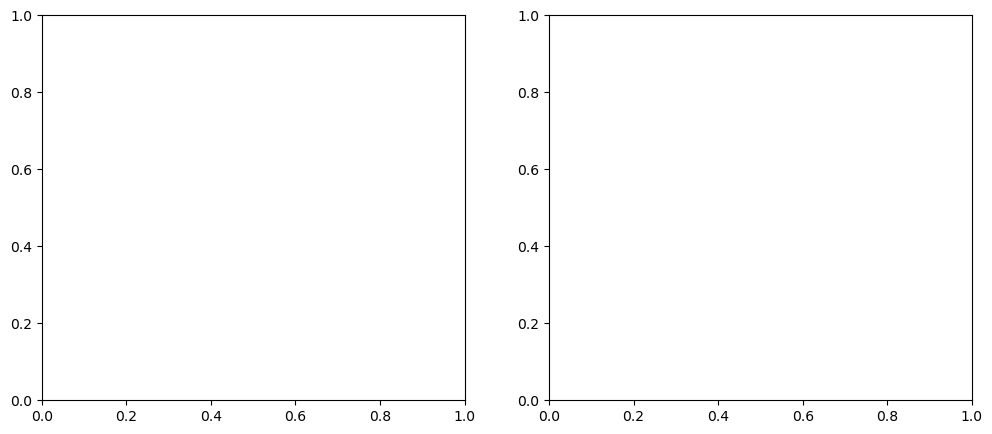

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

We set `nrows=1` and `ncols=2` to create two axes (plots) that are arranged next to each other in one row with two columns. The call to `plt.suplots()` will thus return three objects, the figure (overall chart region) and two axes (two subplots). We store the two axes under the name **ax1** and **ax2**. 

These two axes objects are returned as a numpy array with two values - one for the first and one for the second axes object. We can "unpack" the numpy array into the two separate axes objects by putting the parentheses around them as in `(ax1, ax2)`.

We set `figsize=(12,5)` to set the size of the figure to 12 inches wide and 5 inches high.


See below for an example of how to plot the daily and monthly returns from the Amazon stock dataset in the first and second subplot respectively.

Text(0, 0.5, 'Monthly Return')

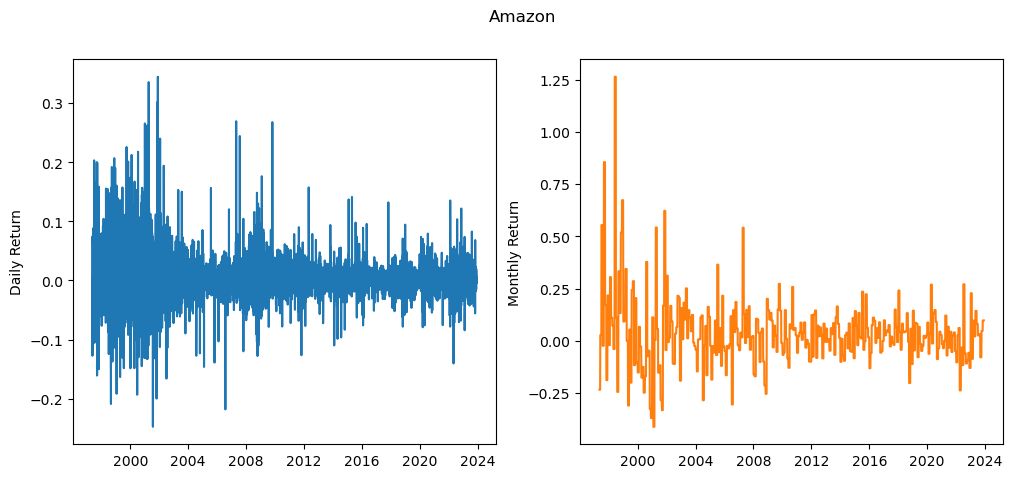

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

fig.suptitle('Amazon')

ax1.plot(amzn['daily_ret'], color='tab:blue')
ax1.set_ylabel('Daily Return')

ax2.plot(amzn['monthly_ret'], color='tab:orange')
ax2.set_ylabel('Monthly Return')

### Task 3: Creating subplots for Netflix returns

1. Create a figure with *three* subplots (axes) using the `plt.subplots()` function. 
    1. Arrange the three subplots *vertically*. 
    2. Set the figure size to 12*10 inches.
2. In the first subplot, plot the daily Netflix return rates. Use 'grey' as the color.
3. In the second subplot, plot the monthly Netflix return rates. Use 'black' as the color.
4. In the third subplot, plot the Adjusted price as a shaded area. Use 'red' as the color. You can create an area plot with `plt.fill_between()` the same way you would create a line plot with `plt.plot()`. Be aware that when working on the ax object level, you will have to replace `plt.` with the specific ax/subplot you want to plot on.
5. Add a y-axis labels to each subplot: 'Daily Return Rate', 'Monthly Return Rate', 'Adjusted'
6. Add 'Netflix' as a figure title.

In [ ]:
import yfinance as yf
import pandas as pd

nflx = yf.download('nflx', start="2009-01-01")

nflx['ret'] = nflx['Adj Close'].pct_change()
nflx['ret_1'] = nflx['ret'] + 1
nflx['monthly_ret'] = nflx.resample('1M')['ret_1'].transform('prod') - 1
nflx['ann_ret'] = nflx.resample('1A')['ret_1'].transform('prod') - 1

nflx.head()

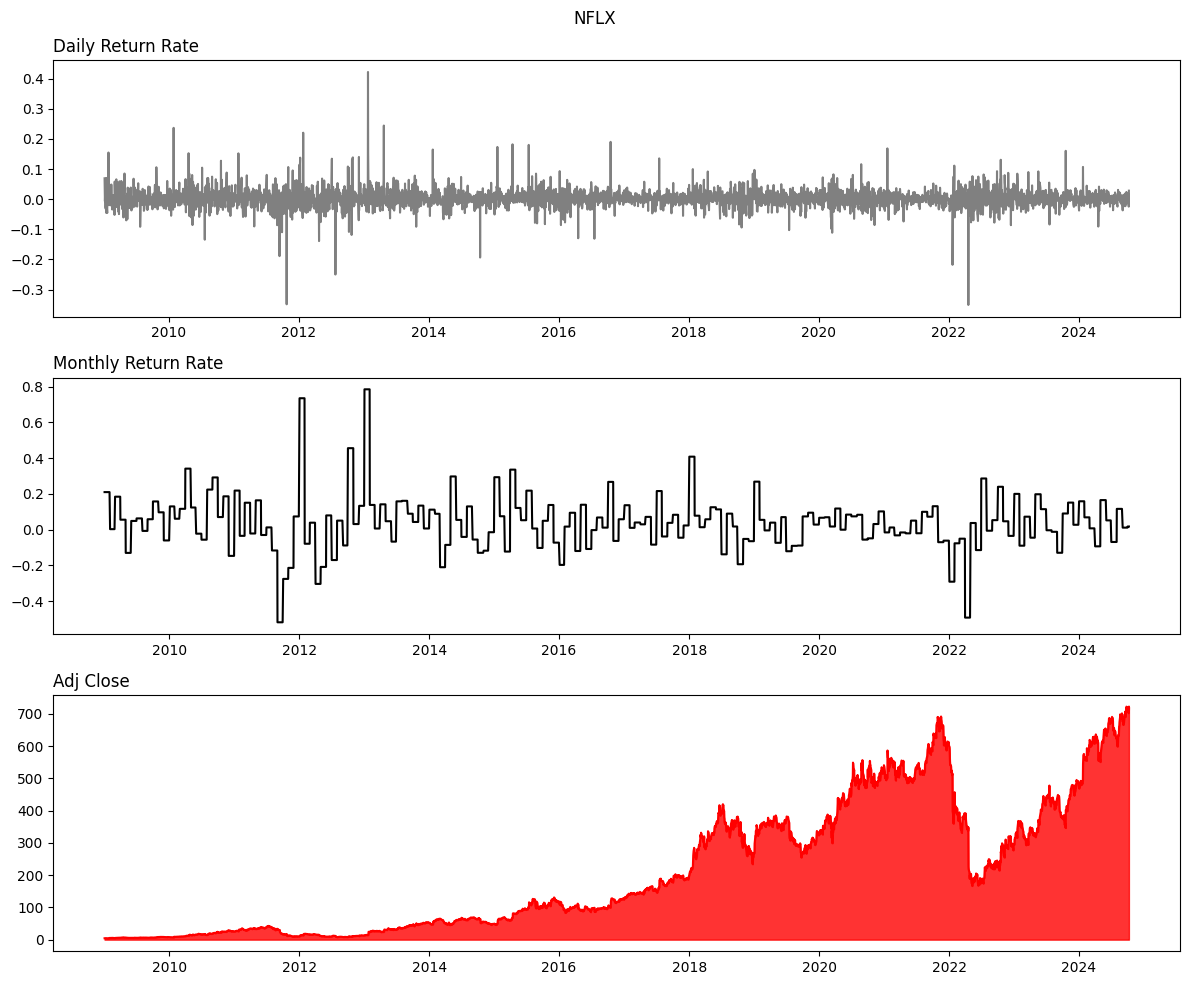

In [30]:
# Create fig and ax objects (3 subplots, vertically arranged, figsize 12*10)


# Set fig title to 'Netflix'


# 1st subplot: Netflix daily returns



# 2nd subplot: Netflix monthly returns




# 4th subplot: Netflix adjusted close





### Bonus tasks

1. Add a horizontal line at the y-value 0 to each subplot. The line should be grey, dashed and have a linewidth of 1.
2. Calculate the annual return.
3. Add a fourth subplot on the annual return after the subplot on the monthly return. 
4. Add a grid to each subplot.

In [3]:
# calculate annual return rates


In [4]:
# Create fig and ax objects (3 subplots, vertically arranged, figsize 12*10)



# Set fig title to 'Netflix'



# 1st subplot: Netflix daily returns





# 2nd subplot: Netflix monthly returns






# 3rd subplot: Netflix annual returns





# 4th subplot: Netflix adjusted close







<br>

<br>

<br>

<br>

<br>

<br>


### Further adjustments: Adding a title *inside* the axes

This is not part of the actual exercises. Just another way we can improve the look of the plot.

- Setting a style changes the overall appearance of the plot. I like to combine ggplot and fivethirtyeight.
- To further optimise the appearance of the plot, you can change the size of titles, ticklabels and the linewidth with the rcParams dictionary. rcParams stands for runtime configuration parameters. By changing these values, we change the configuration of all plots and subplots in the current jupyter notebook.


In [5]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

plt.rcParams['axes.titlesize'] = 12 # to set the font size of the title of each subplot to 12
plt.rcParams["xtick.labelsize"] = 11 # to set the font size of tick labels on the x axis to 11
plt.rcParams["ytick.labelsize"] = 11 # to set the font size of tick labels on the y axis to 11
plt.rcParams["lines.linewidth"] = 2 # to set the line width for all line plots to 2


# add rest of code here



<br> 

<br>

## Part 2 - Comparing Big Tech Companies

The second part of this workshop will teach you how to import income statements from yahoo finance using a function. If you would like to learn more about how the function works, you can find the code in the yfscrap.py file.

Once the income statements have been scraped from yahoo finance, we will prepare the data and then create a bar chart of the profit margins using seaborn.


<br>

## Importing income statements from yahoo finance

We want to download the income statements from the big tech companies, that is, Facebook, Apple, Amazon, Google and Microsoft from the yahoo finance website. Unfortunately, the pandas_datareader library does not provide a function to do that, which is why we had to write the code ourselves. 

The `yf_financials()` function is part of the yfscrap.py script, which is part of the files that you have received for this session. 

To make the yfscrap.py file accessible in Python, it should be located in the same folder as this jupyter notebook.

<br>

### Importing an income statements

In the example below we are using the `yf_financials()` function to import the income statement from Amazon. 

You can open the yfscrap.py file to have a look at the function.

We use **selenium** to scrape the data since we require a library that enables us to not only scrape html code, but also interact with the website. When opening yahoo-finance.com, you encounter a cookies pop up window which you can accept or reject. We can automatise the step of clicking the "reject all" buttong with selenium. After having downloaded the table data, we use pandas to transform the data into a dataframe.

In order to learn web scraping you will have to develop a basic understanding of html and css to understand how you can inspect a website to identify relevant html tags and css selectors. For more complex websites you might also have to be somewhat familiar with javascript. Let us know if you are interested to learn how to use Python to scrape websites and we can recommend you online course and other resources.

Let us now use the `yf_financials()` function to scrape an income statement from yahoo-finance.com.

See below for explanations on the code.

In [2]:
# import libraries
from yfscrap import yf_financials
import pandas as pd

# change pandas options to display all columns and change display format
pd.set_option('display.max.columns', None)

# download Amazon balance sheet
amzn_is = yf_financials('AMZN', type_='is')

amzn_is

Breakdown   comp Total Revenue Cost of Revenue Gross Profit Operating Expense  \
TTM         AMZN   604,334,000     494,254,000  110,080,000        55,704,000   
12/31/2023  AMZN   574,785,000     480,980,000   93,805,000        56,953,000   
12/31/2022  AMZN   513,983,000     446,343,000   67,640,000        55,392,000   
12/31/2021  AMZN   469,822,000     403,507,000   66,315,000        41,436,000   
12/31/2020  AMZN   386,064,000     334,564,000   51,500,000        28,601,000   
12/31/2019  AMZN            --              --           --                --   

Breakdown  Operating Income Net Non Operating Interest Income Expense  \
TTM              54,376,000                                 1,098,000   
12/31/2023       36,852,000                                  -233,000   
12/31/2022       12,248,000                                -1,378,000   
12/31/2021       24,879,000                                -1,361,000   
12/31/2020       22,899,000                                -1,092,000   
12/31/2019               --                                        --   

Breakdown  Other Income Expense Pretax Income Tax Provision  \
TTM                  -1,371,000    54,103,000     9,602,000   
12/31/2023              938,000    37,557,000     7,120,000   
12/31/2022          -16,806,000    -5,936,000    -3,217,000   
12/31/2021           14,633,000    38,151,000     4,791,000   
12/31/2020            2,371,000    24,178,000     2,863,000   
12/31/2019                   --            --            --   

Breakdown  Earnings from Equity Interest Net of Tax  \
TTM                                         -82,000   
12/31/2023                                  -12,000   
12/31/2022                                   -3,000   
12/31/2021                                    4,000   
12/31/2020                                   16,000   
12/31/2019                                       --   

Breakdown  Net Income Common Stockholders  \
TTM                            44,419,000   
12/31/2023                     30,425,000   
12/31/2022                     -2,722,000   
12/31/2021                     33,364,000   
12/31/2020                     21,331,000   
12/31/2019                             --   

Breakdown  Diluted NI Available to Com Stockholders Basic EPS Diluted EPS  \
TTM                                      44,419,000      4.28        4.19   
12/31/2023                               30,425,000      2.95        2.90   
12/31/2022                               -2,722,000     -0.27       -0.27   
12/31/2021                               33,364,000      3.30        3.24   
12/31/2020                               21,331,000      2.13        2.09   
12/31/2019                                       --        --          --   

Breakdown  Basic Average Shares Diluted Average Shares  \
TTM                  10,380,000             10,637,500   
12/31/2023           10,304,000             10,492,000   
12/31/2022           10,189,000             10,189,000   
12/31/2021           10,120,000             10,300,000   
12/31/2020           10,000,000             10,200,000   
12/31/2019                   --                     --   

Breakdown  Total Operating Income as Reported Total Expenses  \
TTM                                54,376,000    549,958,000   
12/31/2023                         36,852,000    537,933,000   
12/31/2022                         12,248,000    501,735,000   
12/31/2021                         24,879,000    444,943,000   
12/31/2020                         22,899,000    363,165,000   
12/31/2019                                 --             --   

Breakdown  Net Income from Continuing & Discontinued Operation  \
TTM                                                44,419,000    
12/31/2023                                         30,425,000    
12/31/2022                                         -2,722,000    
12/31/2021                                         33,364,000    
12/31/2020                                        

**Line 2f: Importing libraries**


```python
from yfscrap import yf_financials
```
We import the function `yf_financials()` from the local module `yfscrap`, which is located in the same folder as this jupyter notebook.

<br>

**Line 6: Changing the pandas display options**

```python
pd.set_option('display.max.columns', None)
```
The income statement has many columns. To always display all columns from a dataframe we set the max columns option to None.

<br>

**Line 9: Downloading the income statement**


```python
amzn_is = yf_financials('AMZN', type_='is')
```
The `yf_financials()` function takes two arguments - the ticker of the stock and the type of document to download (balance sheet or income statment). We pass `'is'` as the argument for `type_` to download the income statement.

&nbsp;

&nbsp;

### Downloading multiple income statements

Since we want to download income statements from more than one company, it would be ideal if we could combine all income statements into a dataframe.

We can easily do this with the yf_financials function by passing on a list of stock symbols.

In [1]:
# download income statement for Amazon
from yfscrap import yf_financials

income_statements = yf_financials(['AMZN', 'MSFT'], type_='is')

income_statements

Breakdown   comp Total Revenue Cost of Revenue Gross Profit Operating Expense  \
TTM         AMZN   604,334,000     494,254,000  110,080,000        55,704,000   
12/31/2023  AMZN   574,785,000     480,980,000   93,805,000        56,953,000   
12/31/2022  AMZN   513,983,000     446,343,000   67,640,000        55,392,000   
12/31/2021  AMZN   469,822,000     403,507,000   66,315,000        41,436,000   
12/31/2020  AMZN   386,064,000     334,564,000   51,500,000        28,601,000   
12/31/2019  AMZN            --              --           --                --   
TTM         MSFT   245,122,000      74,114,000  171,008,000        61,575,000   
6/30/2024   MSFT   245,122,000      74,114,000  171,008,000        61,575,000   
6/30/2023   MSFT   211,915,000      65,863,000  146,052,000        57,529,000   
6/30/2022   MSFT   198,270,000      62,650,000  135,620,000        52,237,000   
6/30/2021   MSFT   168,088,000      52,232,000  115,856,000        45,940,000   

Breakdown  Operating Income Net Non Operating Interest Income Expense  \
TTM              54,376,000                                 1,098,000   
12/31/2023       36,852,000                                  -233,000   
12/31/2022       12,248,000                                -1,378,000   
12/31/2021       24,879,000                                -1,361,000   
12/31/2020       22,899,000                                -1,092,000   
12/31/2019               --                                        --   
TTM             109,433,000                                   222,000   
6/30/2024       109,433,000                                   222,000   
6/30/2023        88,523,000                                 1,026,000   
6/30/2022        83,383,000                                    31,000   
6/30/2021        69,916,000                                  -215,000   

Breakdown  Other Income Expense Pretax Income Tax Provision  ...         EBIT  \
TTM                  -1,371,000    54,103,000     9,602,000  ...   56,855,000   
12/31/2023              938,000    37,557,000     7,120,000  ...   40,739,000   
12/31/2022          -16,806,000    -5,936,000    -3,217,000  ...   -3,569,000   
12/31/2021           14,633,000    38,151,000     4,791,000  ...   39,960,000   
12/31/2020            2,371,000    24,178,000     2,863,000  ...   25,825,000   
12/31/2019                   --            --            --  ...           --   
TTM                  -1,868,000   107,787,000    19,651,000  ...  110,722,000   
6/30/2024            -1,868,000   107,787,000    19,651,000  ...  110,722,000   
6/30/2023              -238,000    89,311,000    16,950,000  ...   91,279,000   
6/30/2022               302,000    83,716,000    10,978,000  ...   85,779,000   
6/30/2021             1,401,000    71,102,000     9,831,000  ...   73,448,000   

Breakdown        EBITDA Reconciled Cost of Revenue Reconciled Depreciation  \
TTM         106,528,000                494,254,000              49,673,000   
12/31/2023   89,402,000                480,980,000              48,663,000   
12/31/2022   38,352,000                446,343,000              41,921,000   
12/31/2021   74,393,000                403,507,000              34,433,000   
12/31/2020   51,076,000                334,564,000              25,251,000   
12/31/2019           --                         --                      --   
TTM         133,009,000                 74,114,000              22,287,000   
6/30/2024   133,009,000                 74,114,000              22,287,000   
6/30/2023   105,140,000                 65,863,000              13,861,000   
6/30/2022   100,239,000                 62,650,000              14,460,000   
6/30/2021    85,134,000                 52,232,000              11,686,000   

Breakdown  Net Income from Continuing Operation Net Minority Interest  \
TTM                                                44,419,000           
12/31/2023                                         30,425,000           
12/31/2022           

&nbsp;

### Task 1: Download and combine income statements

1. Import pandas and the yf_financials function from yfscrap.
2. Download the income statements for all companies listed in `tickers`.


In [1]:
# import yf_financials

# download income statements
tickers = ['AMZN', 'NFLX', 'META', 'MSFT', 'GOOG']


&nbsp;

### Task 2: Calculating gross profit margin and operating margin

1. Create a new column in the income_statements dataset to calculate the Gross Profit Margin

     $ Gross \ Profit \ Margin = \frac{Gross \ Profit}{Total \ Revenue} \cdot 100$

<br>

2. Create another new column in the income_statements dataset to cacluate the operating margin: EBIT divided by total revenue x 100

     $ Operating \ Margin = \frac{EBIT}{Total \ Revenue} \cdot 100$

&nbsp;

&nbsp;

## Plotting with seaborn

In the next step, we will create a bar plot showing the gross profit and operating margin for each company. We will use the seaborn library for this plot. The seaborn library is based on matplotlib. In comparison to matplotlib, it is often a lot easier to create a nice looking plot with seaborn. Matplotlib, however, offers you more options to create highly customized plots.

### Barplot with seaborn

To demonstrate how to create a barplot with seaborn, we will use the titanic dataset to plot how passenger class and sex affect survival rates. Below we first load the titanic dataset with `sns.load_dataset('titanic')`.

The first three columns code for whether a passenger survived (0: no, 1: yes), the passenger class (1, 2, 3) and the sex (male, female).

In [5]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

### A simple bar plot

We will now plot the survival rates based on the **survived** column as a function of the passenger class, which is stored in the **pclass** column. We want to plot the passenger class on the x-axis and the Survival rate on the y-axis.

To do so, we use the `catplot()` function to plot the average of the values in the survived column, i.e. the surival rate, for each passenger class. [The `catplot()` function can be used to draw a number of categorical plots:  strip, swarm, box, violin, boxen, point, bar, or count](https://seaborn.pydata.org/tutorial/categorical.html).

We pass as arguments:
1. `x='pclass'`: To plot the categorical variable **pclass** on the x-axis
2. `y='survived'`: To plot the mean of the column **survived** on the y-axis
3. `kind='bar'`: To draw a barplot.
4. `data=titanic`: The dataset to be used.

We assign the created plot object to the variable **g**, so that we can call the plot object to modify it later on.

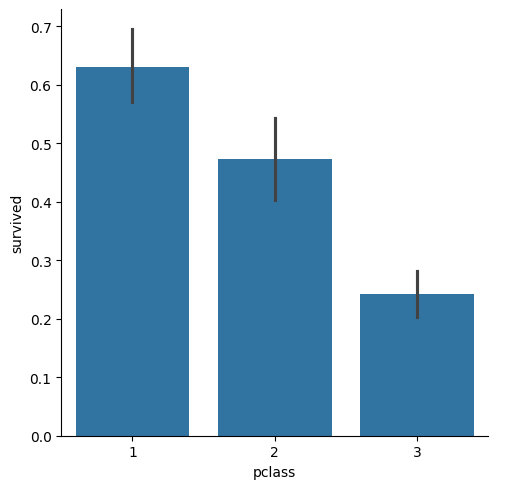

In [6]:
g = sns.catplot(
    x='pclass', 
    y='survived', 
    kind='bar', 
    data=titanic, 
    estimator='mean'
)


### Task 3: Grouped bar plot with seaborn

1. Import seaborn under the alias sns.
2. Load the titanic dataset.
3. Display the head of the titanic dataset.
4. Create a barplot using seaborn plotting pclass on the x-axis and the survival rate on the y-axis.
5. Search online how to create a grouped barplot as in the example below.

<img src="https://www.dropbox.com/s/y09ppna65v8yaqd/titanic_bar.png?dl=1">

&nbsp;

&nbsp;

### Creating a margin plot with seaborn

Before we can plot the data, we have to prepare it so that we can create a grouped barplot.

### Preparing the data

In the first step we will select the most recent data. ttm represents last 12 months, which is at this time of the year pretty close to the entire year 2024.

Line 3: We set the subset of columns that are relevant for the margin plot.

Line 4: We use boolean indexing to select the rows where the index is equal to ttm.

Line 5: We subset the data further to only the relevant columns


In [13]:
# selecting most recent data
columns = ['comp', 'gross_profit_margin', 'operating_margin']
margins = income_statements[income_statements.index == "TTM"]
margins = margins[columns]

margins

Breakdown  comp  gross_profit_margin  operating_margin
TTM        AMZN            18.215093          9.407877
TTM        NFLX            43.837174         24.466115
TTM        META            81.404556         40.488971
TTM        MSFT            69.764444         45.170160
TTM        GOOG            57.346992         31.016132

In order to create a grouped bar plot which plots two bars, one for the gross profit margin and one for the operating margin, for each company, we have to *reshape* the dataset. 

We can use the `pd.melt()` function to combine the values from the columns **gross_profit_margin** and **operating_margin** into a single column. It will also add a new categorical variable to the dataset that uses the column names **gross_profit_margin** and **operating_margin** to indicate what the values represent.

The `pd.melt()` function takes as arguments:
1. `margins`: The dataframe that should be reshaped as the first argument.
2. `id_vars='Comp'`: The column that identifies a unique observation, which is the **Comp** column. We pass the **Comp** column as the identifier, so that those values are excluded from the column that combines the margin values.
3. `value_vars`: The columns that we want to move from wide to long, which are **gross_profit_margin** and **operating_margin**. In principle, not necessary to specify the variables since these are all remaining variables.
3. `var_name='margin_type'`: The name to be used for the new categorical variable.
4. `value_name='margin_value'`: The name to be used for the column that combines the values.


In [17]:
# reshaping the dataset to combine the margin values into a single column
margins_long = pd.melt(
    margins, 
    id_vars='comp',
    value_vars=['gross_profit_margin', 'operating_margin'],
    var_name='margin_type', 
    value_name='margin_value'
    )

margins_long

comp          margin_type  margin_value
0  AMZN  gross_profit_margin     18.215093
1  NFLX  gross_profit_margin     43.837174
2  META  gross_profit_margin     81.404556
3  MSFT  gross_profit_margin     69.764444
4  GOOG  gross_profit_margin     57.346992
5  AMZN     operating_margin      9.407877
6  NFLX     operating_margin     24.466115
7  META     operating_margin     40.488971
8  MSFT     operating_margin     45.170160
9  GOOG     operating_margin     31.016132

&nbsp;

### Task 4: Margin Plot

Now it is your turn to use the reshaped dataset to create a barplot of the margin values with seaborn. 

Plot the company names on the x-axis and the margin value on the y-axis. Plot the gross profit margin and operating margin in different colours.

### Customizing a seaborn catplot

We are now going to customize the barplot by changing the plot title, axis and legend labels and the overall visual appearance by applying a theme.

- `sns.set_style('whitegrid')` sets the theme to whitegrid. There are five themes available: darkgrid, whitegrid, dark, white, and ticks
- `g.set()` can be used to set the title, axis labels, axis ticks and limits
- `g._legend.set_title()` sets the legend title
- `g._legend.texts[i].` to set a text value for the i-th label

/Users/m.wiemers/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/m.wiemers/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/m.wiemers/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/m.wiemers/miniconda3/envs/py311/lib/python3.11/site-packages

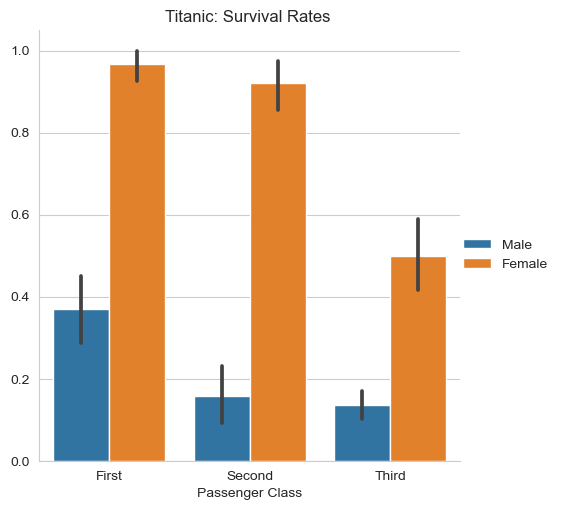

In [8]:
sns.set_style('whitegrid')

g = sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=titanic)

g.set(title='Titanic: Survival Rates ', xlabel='Passenger Class', ylabel='')

g._legend.set_title('')
g._legend.texts[0].set_text('Male')
g._legend.texts[1].set_text('Female')

### Task 5: Customizing the margin plot

1. Set the title to 'Big Tech: Margins'
2. Remove the x and y axis label
3. Remove the legend title
4. Order the x axis labels based on the gross profit margin in descending order.
5. Change the legend labels to Gross Profit Margin and Operatin Margin.

<div  class="alert alert-block alert-info" style="color:#1b1b1b; background-color:#f2f2f2; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;padding:50px; width:90%">

### Please give us your feedback!

This is the first time that we are delivering our trainings online. In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack.

We would be grateful if you could take **1 min** before the end of the workshop to get your feedback!

[Click here to open the survey!](<https://lse.eu.qualtrics.com/jfe/form/SV_6eSrOVWuit28qcS?coursename=Python for Accounting 3&topic=Python&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/EXTCMIGvJ_ZBonZtJM6dw3EB25ks0Auj-L0uuaz5mkdUnQ?e=Kb5BTp&prog=DS&version=23-24&link2=>)
